In [3]:
from keras.layers import Input, Lambda, Dense, Flatten ,Dropout
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Major Project/Dataset2/Train'
valid_path = '/content/drive/MyDrive/Major Project/Dataset2/Test'


# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False


 # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Major Project/Dataset2/Train/*')

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Major Project/Dataset2/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Major Project/Dataset2/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks = early_stopping

)



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

<ipython-input-3-17d59ffff95d>:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
37/37 [==============================] - 833s 22s/step - loss: 1.0687 - accuracy: 0.6610 - val_loss: 0.7549 - val_accuracy: 0.7692
Epoch 2/5
37/37 [==============================] - 21s 576ms/step - loss: 0.1573 - accuracy: 0.9559 - val_loss: 0.8195 - val_accuracy: 0.8040
Epoch 3/5
37/37 [==============================] - 21s 556ms/step - loss: 0.0684 - accuracy: 0.9856 - val_loss: 0.7061 - val_accuracy: 0.8610
Epoch 4/5
37/37 [==============================] - 20s 555ms/step - loss: 0.0441 - accuracy: 0.9949 - val_loss: 0.6367 - val_accuracy: 0.8561
Epoch 5/5
37/37 [==============================] - 22s 577ms/step - loss: 0.0467 - accuracy: 0.9924 - val_loss: 0.6459 - val_accuracy: 0.8710


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


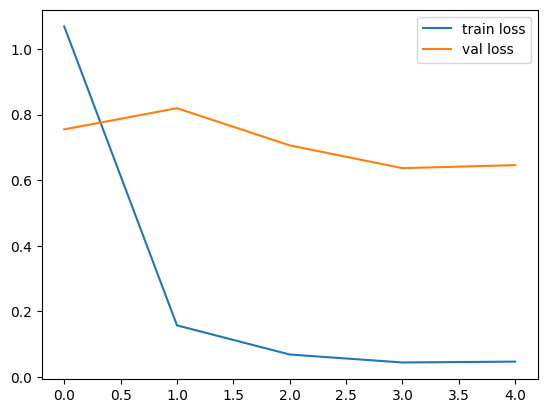

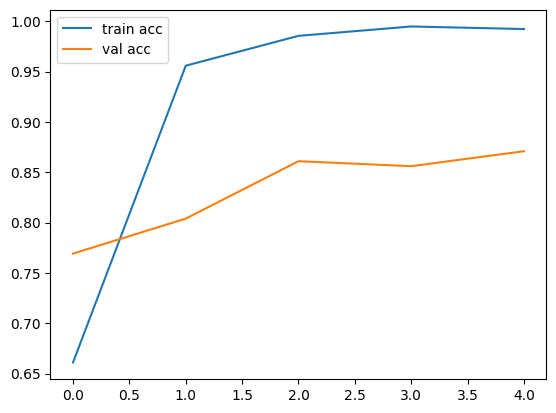

<Figure size 640x480 with 0 Axes>

In [4]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Major Project/VGG19 RECOGNITION /Loss vs Val_los ')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Major Project/VGG19 RECOGNITION /accuracy vs vala  ')

In [5]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/MyDrive/Major Project/VGG19 RECOGNITION /vgg19_recognition_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
